[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Train Football Player Detector

---

[![Download Dataset](https://app.roboflow.com/images/download-dataset-badge.svg)](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc)

This notebook is based on the [How to Train YOLOv8 Object Detection on a Custom Dataset](https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb) notebook from the [roboflow/notebooks](https://github.com/roboflow/notebooks) repository.

## Configure API keys

- Open your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [14]:
!nvidia-smi

Mon Jan 20 23:11:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   66C    P8             11W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install dependencies

In [16]:
!pip3 install -q ultralytics roboflow

## Imports

In [18]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

## Pull dataset

In [20]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
ROBOFLOW_API_KEY = user_secrets.get_secret("Roboflow")


# ROBOFLOW_API_KEY = userdata.get('Roboflow')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
# version = project.version(10)
# dataset = version.download("yolov8")
project = rf.workspace("private-uofaa").project("football-detection-ysgxf")
version = project.version(2)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/kaggle/working/datasets’: File exists
/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...


**NOTE:** Update `data.yaml` structure to align with the latest requirements of the `ultralytics` package.



In [21]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

## Custom training

In [22]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml batch=8 epochs=30 imgsz=1280 plots=True device=0,1 patience=5 verbose=True

/kaggle/working
Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/datasets/Football-Detection-2/data.yaml, epochs=30, time=None, patience=5, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=(0, 1), workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

In [23]:
!ls {HOME}/runs/detect/train6/

args.yaml					  train_batch0.jpg
events.out.tfevents.1737410942.5aacd24b7641.84.0  train_batch1.jpg
labels_correlogram.jpg				  train_batch2.jpg
labels.jpg					  weights


/kaggle/working


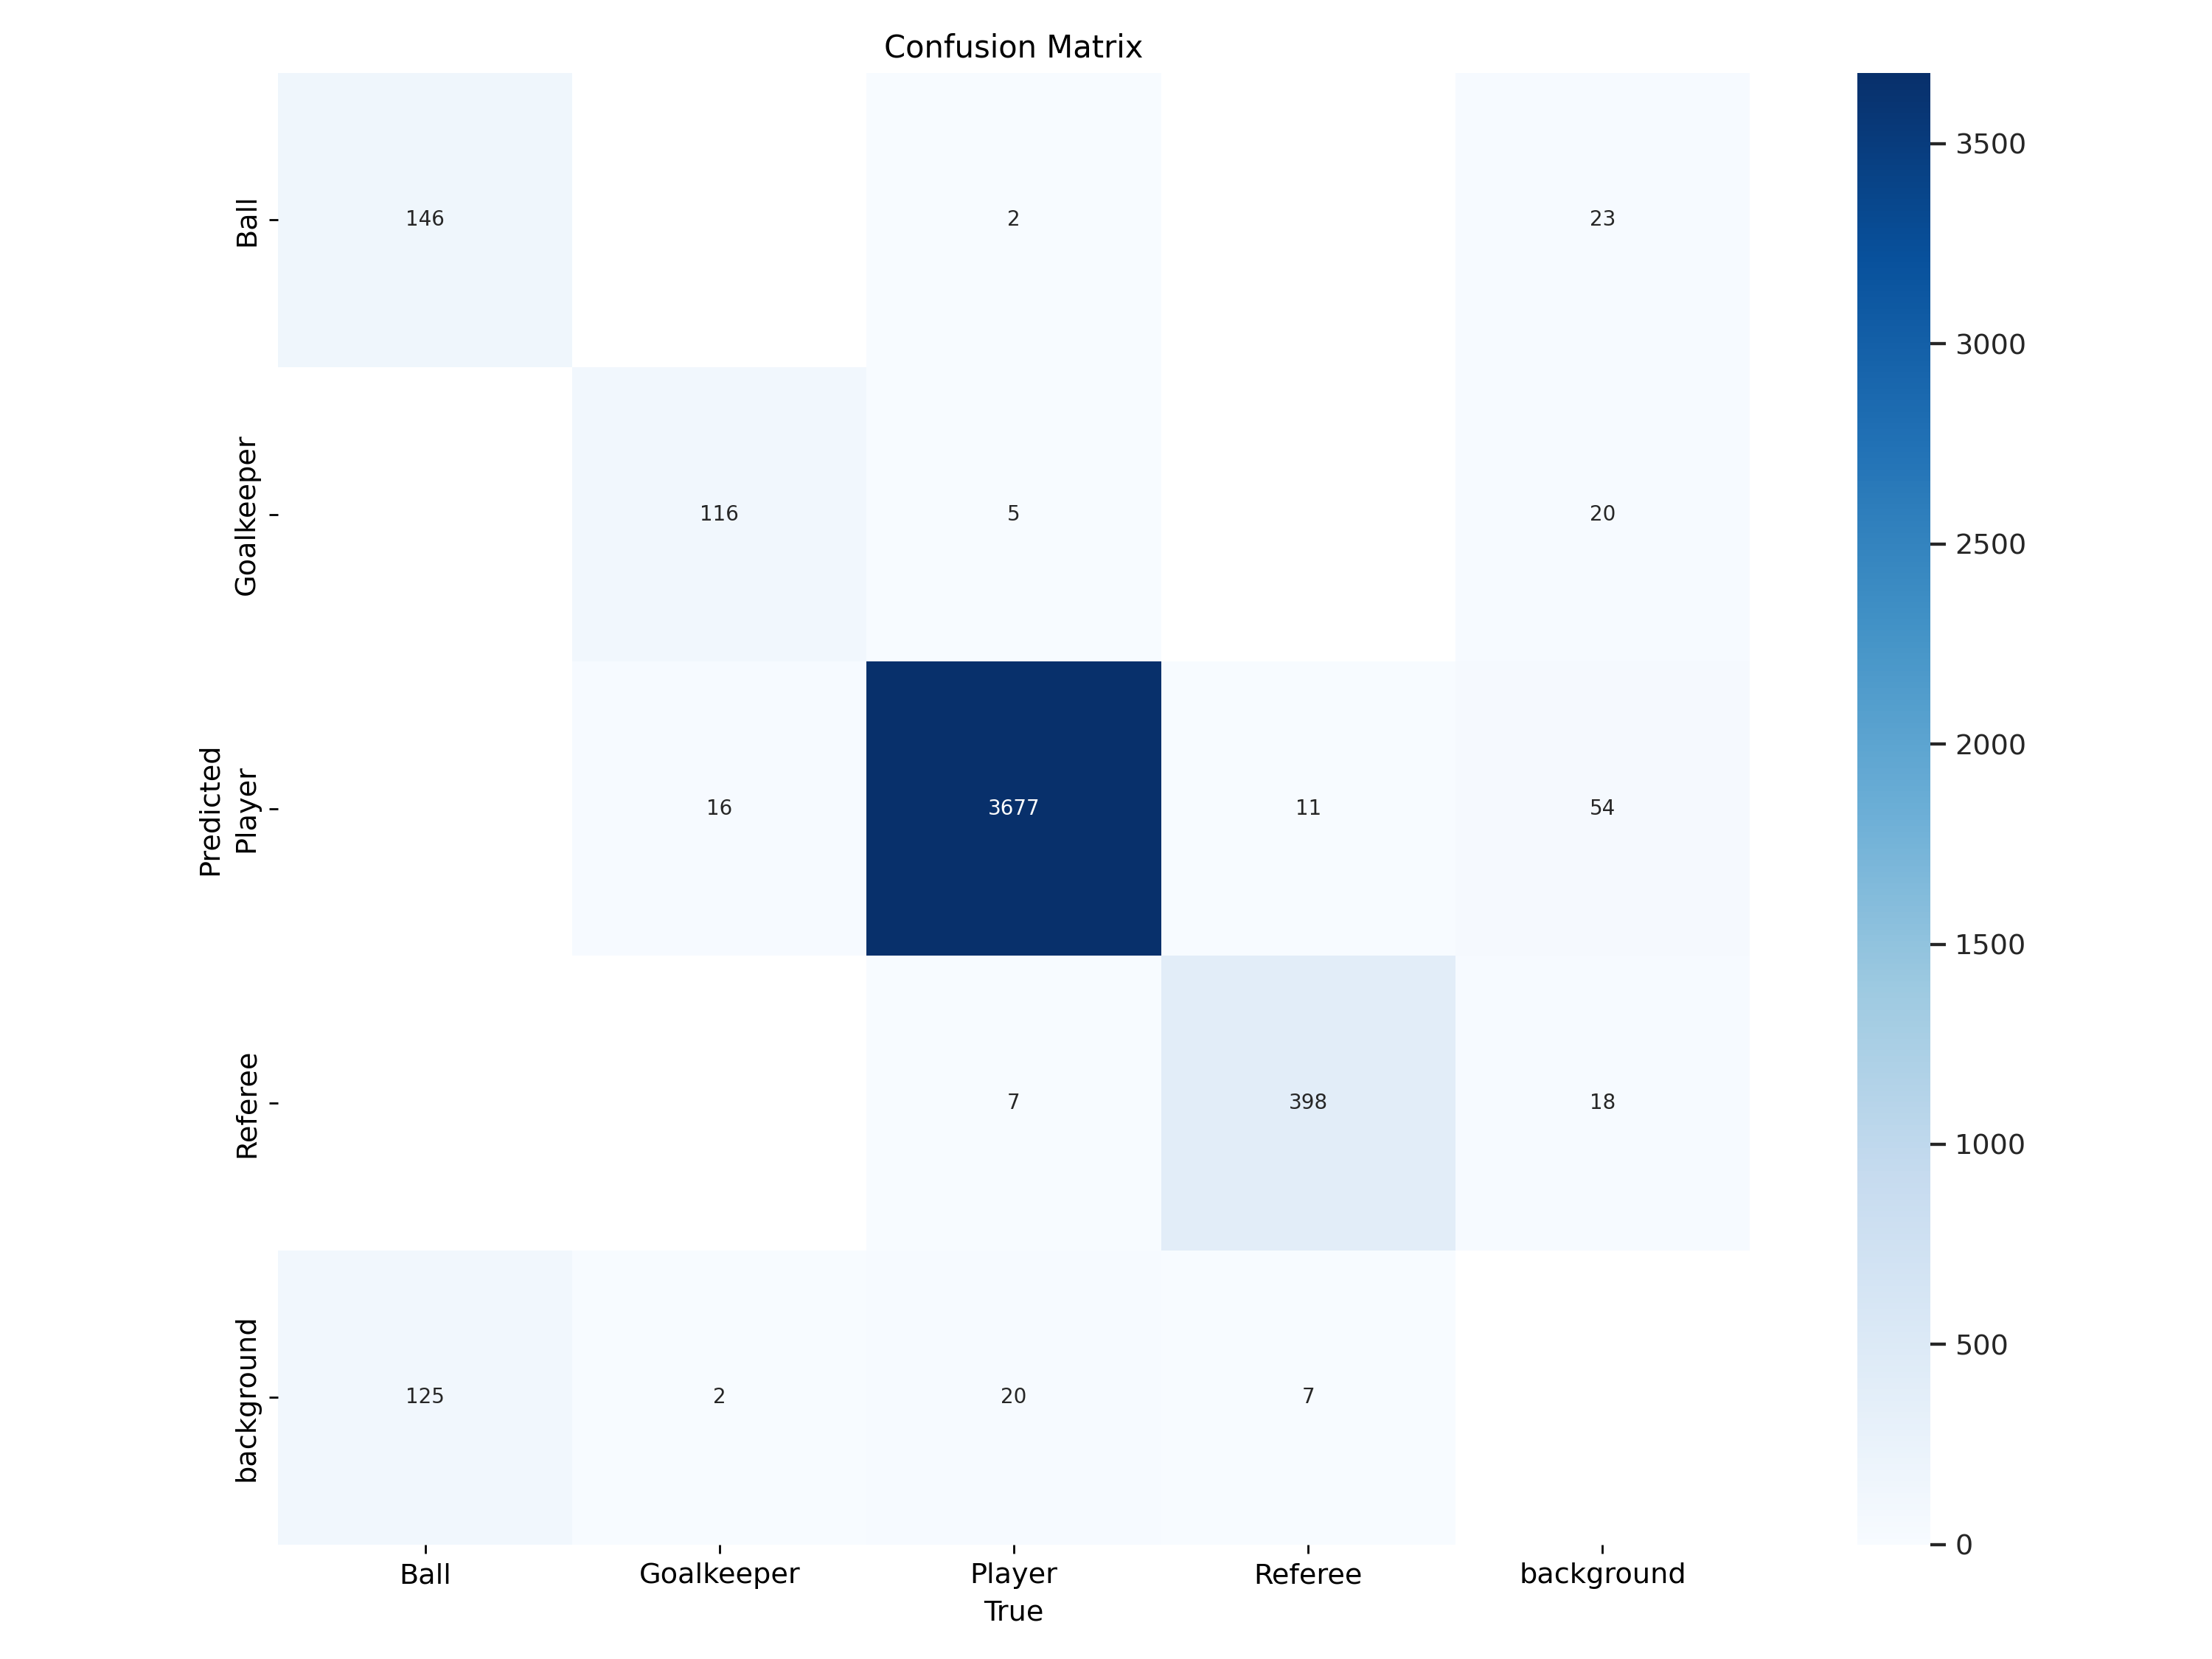

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/confusion_matrix.png', width=600)

/kaggle/working


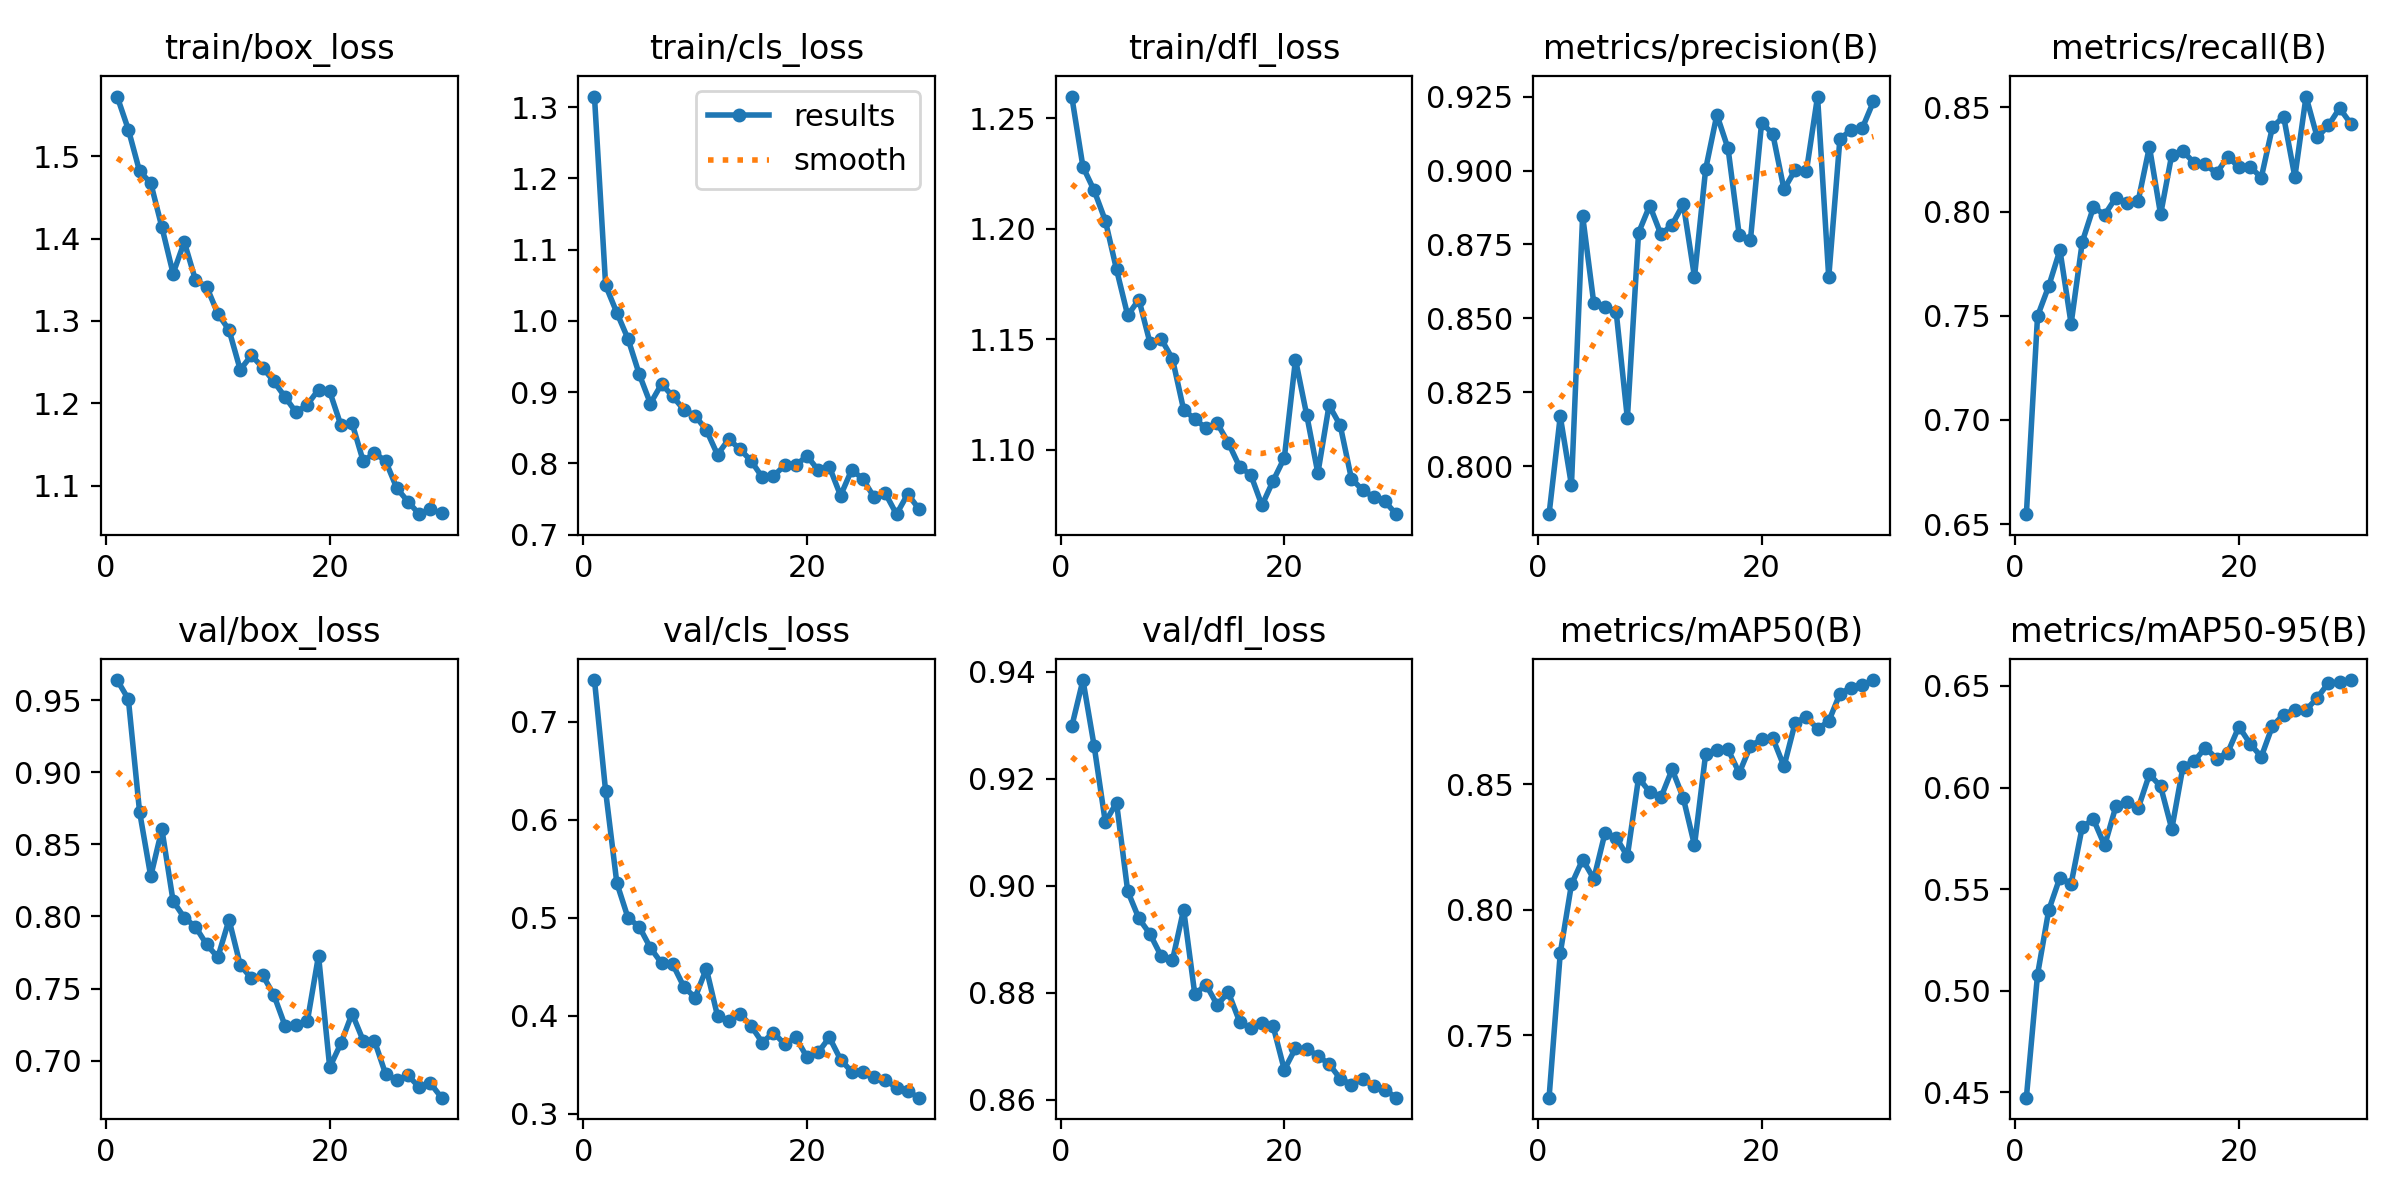

In [27]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/results.png', width=600)

/kaggle/working


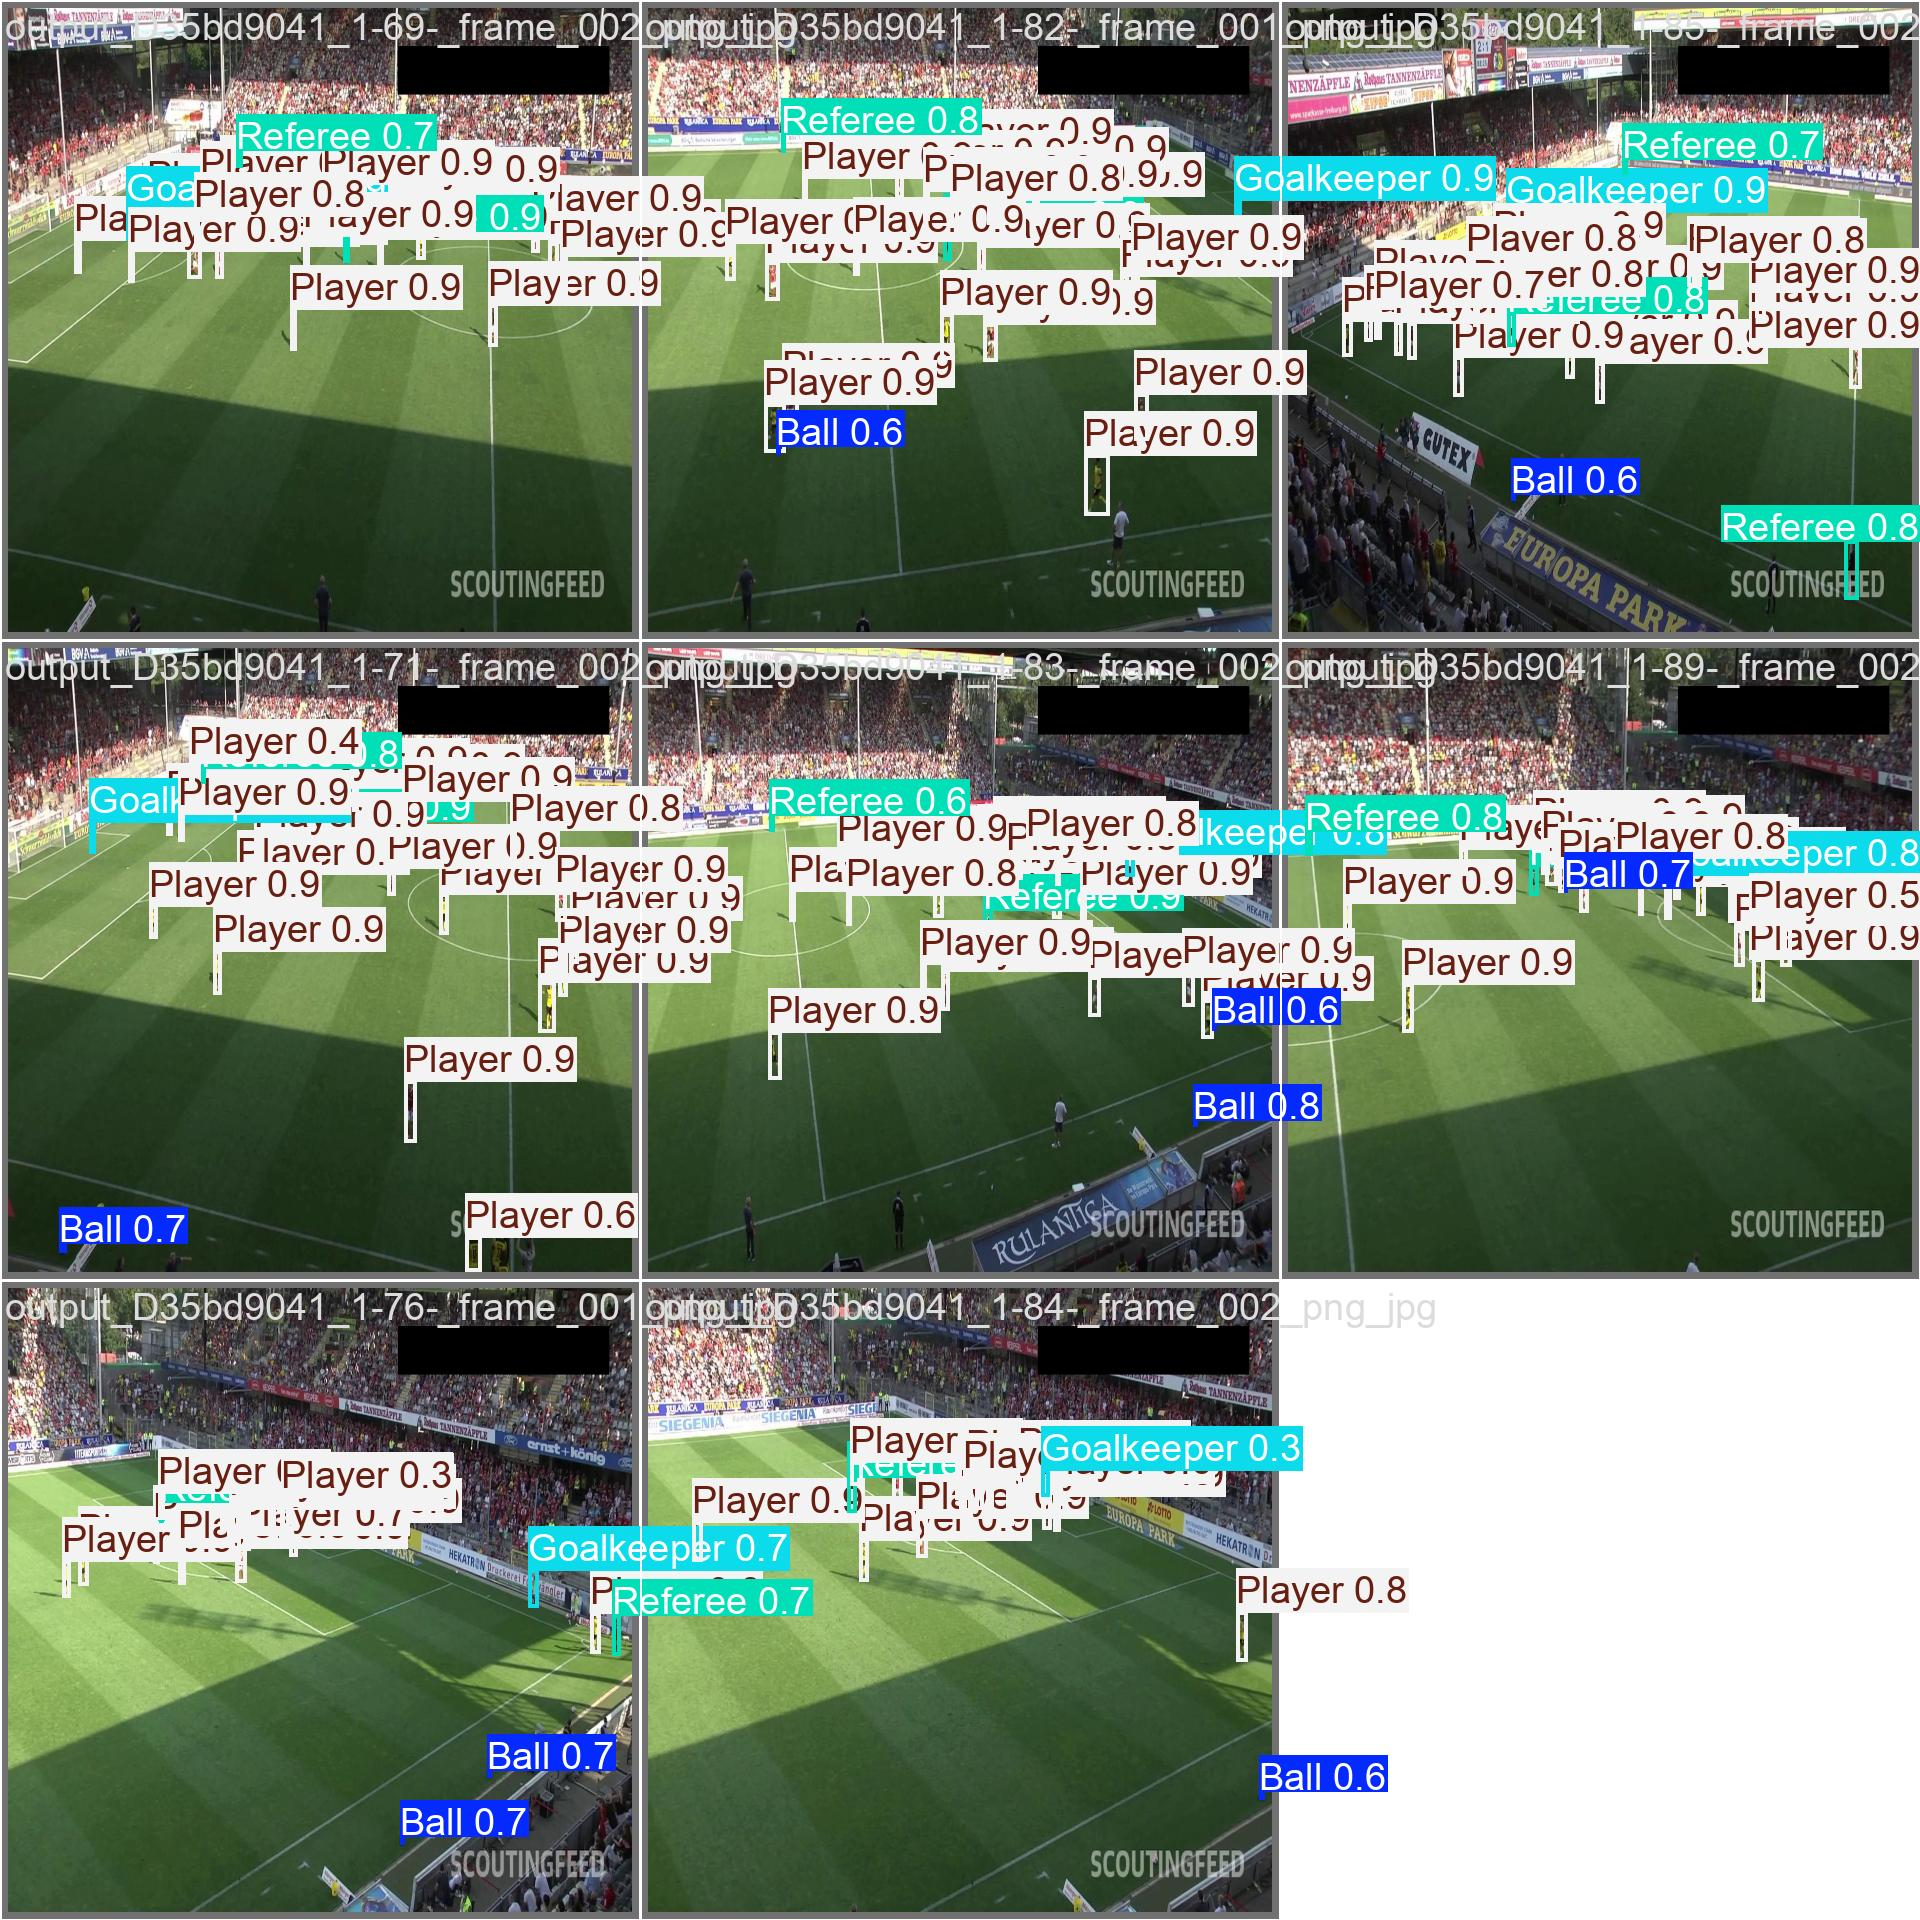

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train6/val_batch0_pred.jpg', width=600)

## Validate custom model

In [29]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml imgsz=1280

/kaggle/working
Ultralytics 8.3.64 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,127,420 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /kaggle/working/datasets/Football-Detection-2/valid/labels.cache..
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        186       4532       0.93      0.844      0.898      0.668
                  Ball        172        271      0.886      0.515      0.663      0.316
            Goalkeeper        132        134       0.89      0.902      0.947      0.728
                Player        186       3711      0.984       0.99      0.994       0.86
               Referee        185        416       0.96      0.972      0.986      0.769
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarn

## Deploy model on Roboflow

In [33]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
ROBOFLOW_API_KEY = user_secrets.get_secret("Roboflow")


# ROBOFLOW_API_KEY = userdata.get('Roboflow')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)


project = rf.workspace("private-uofaa").project("football-detection-ysgxf")
version = project.version(3)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/kaggle/working/datasets’: File exists
/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Football-Detection-3 in yolov8:: 100%|██████████| 3544/3544 [00:00<00:00, 3615.26it/s]


In [35]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train6/")

Dependency ultralytics==8.0.196 is required but found version=8.3.64, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/private-uofaa/football-detection-ysgxf/3
Share your model with the world at: https://universe.roboflow.com/private-uofaa/football-detection-ysgxf/model/3
